In [2]:
import pydpmd as dp
from pydpmd.plot import draw_particles_frame, create_animation, downsample, draw_circle
from pydpmd.utils import split_systems, join_systems
import matplotlib.pyplot as plt
import numpy as np
import os
from mode_resources import *
from system_building_resources import *
import subprocess
import h5py
from collections import defaultdict
from correlation_functions import compute_stress_acf, compute_einstein_helfand_stress_acf
from scipy.interpolate import make_smoothing_spline
import pandas as pd
from matplotlib.colors import LogNorm

In [4]:
root = '/home/mmccraw/dev/data/11-01-25/'

dynamics_base = os.path.join(root, 'rb-dynamics-pressure')

ke = []
pe = []
te = []
temp = []
delta_phi = []
temp_target = []
mu_eff = []
nv = []
pressure = []
all_data = []
for fname in tqdm(os.listdir(dynamics_base)):
    path = os.path.join(dynamics_base, fname)
    if os.path.isfile(path):
        continue
    d = dp.data.load(path, location=['final', 'init'], load_trajectory=True)
    pe.append(d.trajectory.pe_total)
    ke.append(d.trajectory.ke_total)
    te.append(d.trajectory.ke_total + d.trajectory.pe_total)
    pressure.append(d.trajectory.pressure)
    temp.append(d.trajectory.temperature)
    temp_target.append(d.target_temp)
    delta_phi.append(d.delta_phi)
    d.calculate_mu_eff()
    mu_eff.append(d.mu_eff[d.system_offset[:-1]])
    nv.append(d.n_vertices_per_particle[d.system_offset[:-1]] - 1)

nv = np.concatenate(nv)
mu_eff = np.concatenate(mu_eff)
delta_phi = np.concatenate(delta_phi)
temp_target = np.concatenate(temp_target)
temp = np.concatenate(temp, axis=1)
te = np.concatenate(te, axis=1)
ke = np.concatenate(ke, axis=1)
pe = np.concatenate(pe, axis=1)
pressure = np.concatenate(pressure, axis=1)

100%|██████████| 25/25 [00:00<00:00, 59.78it/s]


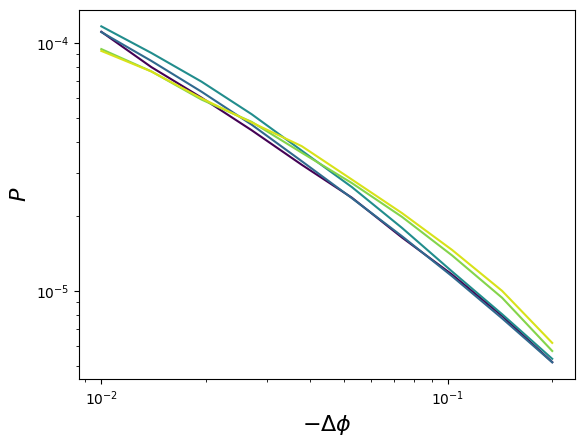

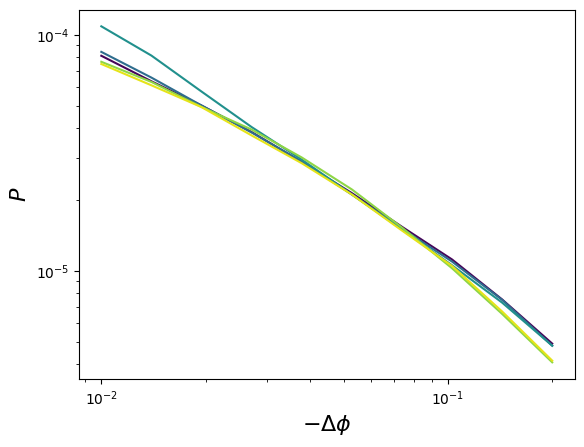

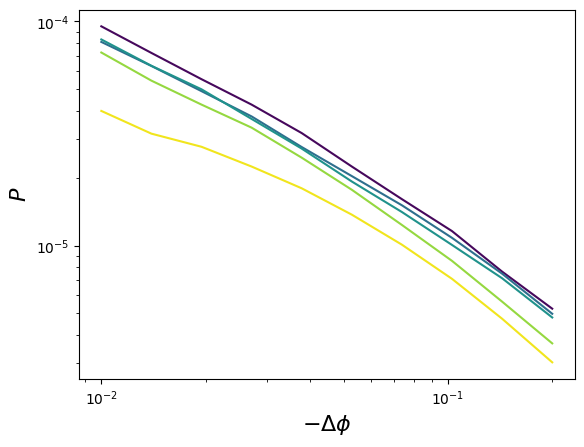

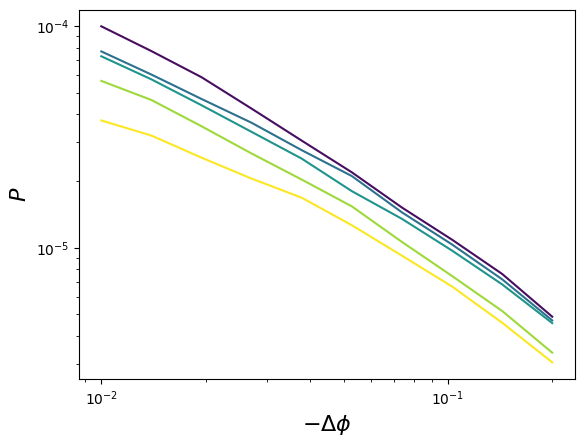

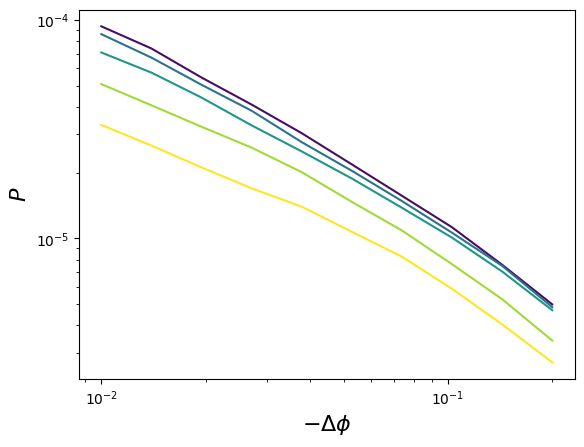

In [61]:
mu_norm = LogNorm(vmin=mu_eff.min(), vmax=mu_eff.max())
cmap = plt.cm.viridis

for _nv in np.unique(nv):
    for _mu in np.unique(mu_eff[nv == _nv]):
        x = delta_phi[(mu_eff == _mu) & (nv == _nv)]
        y = np.mean(pressure[:, (mu_eff == _mu) & (nv == _nv)], axis=0)
        yy = []
        xx = []
        for xi in np.unique(x):
            xx.append(xi)
            yy.append(np.mean(y[x == xi]))
        x = np.array(xx)
        y = np.array(yy)
        y = y[np.argsort(-x)]
        x = -x[np.argsort(-x)]
        x_fit = np.linspace(min(x), max(x), 100)
        spline = make_smoothing_spline(x, y, lam=1e-9)
        y_fit = spline(x_fit)
        # plt.plot(x_fit, y_fit)
        slope = spline(x_fit, nu=1)
        # plt.plot(x_fit[10:90], -slope[10:90], c=cmap(mu_norm(_mu)))
        plt.plot(x, y, c=cmap(mu_norm(_mu)))
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'$P$', fontsize=16)
    plt.xlabel(r'$-\Delta \phi$', fontsize=16)
    plt.show()

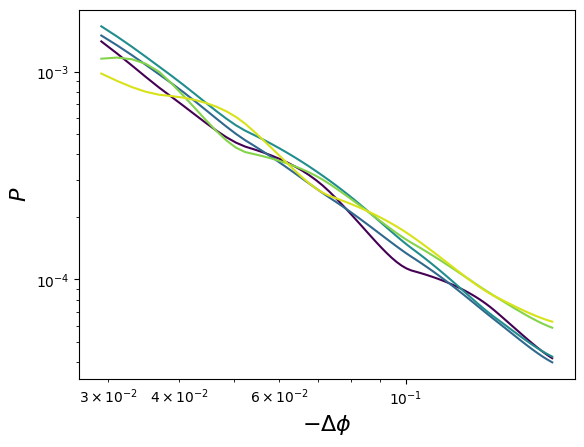

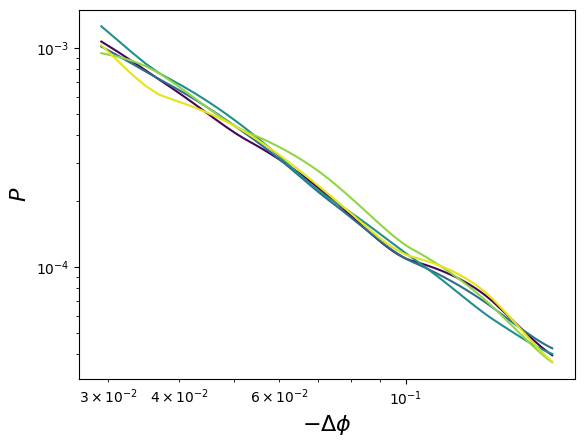

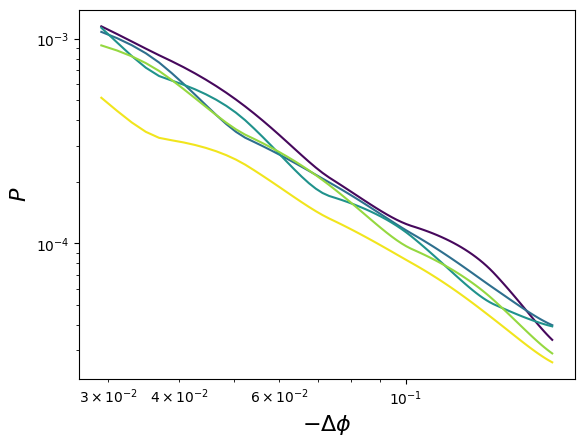

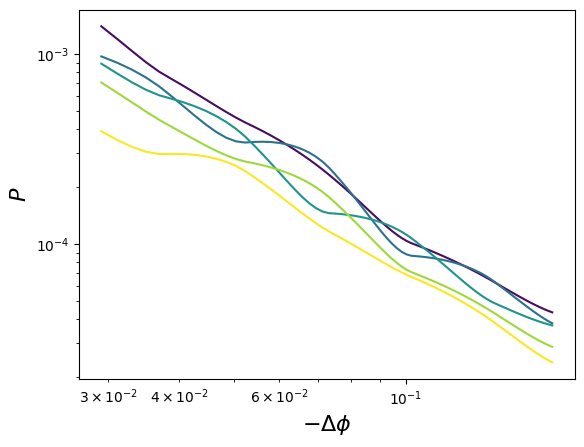

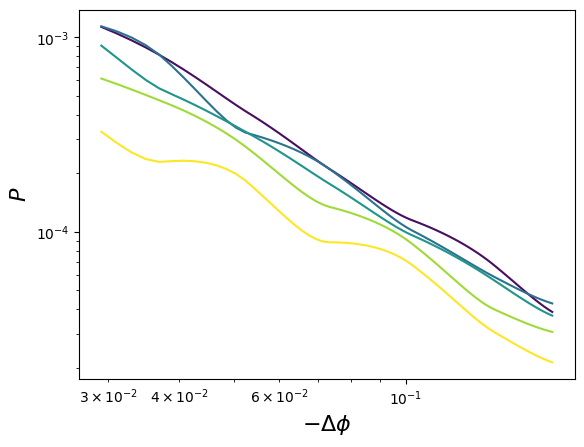

In [60]:
mu_norm = LogNorm(vmin=mu_eff.min(), vmax=mu_eff.max())
cmap = plt.cm.viridis

for _nv in np.unique(nv):
    for _mu in np.unique(mu_eff[nv == _nv]):
        x = delta_phi[(mu_eff == _mu) & (nv == _nv)]
        y = np.mean(pressure[:, (mu_eff == _mu) & (nv == _nv)], axis=0)
        yy = []
        xx = []
        for xi in np.unique(x):
            xx.append(xi)
            yy.append(np.mean(y[x == xi]))
        x = np.array(xx)
        y = np.array(yy)
        y = y[np.argsort(-x)]
        x = -x[np.argsort(-x)]
        x_fit = np.linspace(min(x), max(x), 100)
        spline = make_smoothing_spline(x, y, lam=1e-9)
        y_fit = spline(x_fit)
        # plt.plot(x_fit, y_fit)
        slope = spline(x_fit, nu=1)
        plt.plot(x_fit[10:90], -slope[10:90], c=cmap(mu_norm(_mu)))
        # plt.plot(x, y, c=cmap(mu_norm(_mu)))
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'$P$', fontsize=16)
    plt.xlabel(r'$-\Delta \phi$', fontsize=16)
    plt.show()